<a href="https://colab.research.google.com/github/SvetlanaTsim/ml_in_business/blob/main/lesson_08/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 8. АБ-тестирование (проверяем все в онлайн-экспериментах)

### Домашнее задание

Взять датасет из google диска: https://drive.google.com/file/d/1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

In [1]:
!wget 'https://drive.google.com/uc?export=download&id=1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_' -O data.zip

--2023-01-20 10:21:11--  https://drive.google.com/uc?export=download&id=1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_
Resolving drive.google.com (drive.google.com)... 142.251.16.100, 142.251.16.102, 142.251.16.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6n6cb5v49cbcnnu4iqd6bv11c5flne51/1674210000000/14904333240138417226/*/1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_?e=download&uuid=c718b4c4-d029-487d-a4c7-8c88c5e18eca [following]
--2023-01-20 10:21:11--  https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6n6cb5v49cbcnnu4iqd6bv11c5flne51/1674210000000/14904333240138417226/*/1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_?e=download&uuid=c718b4c4-d029-487d-a4c7-8c88c5e18eca
Resolving doc-04-c0-docs.googleusercontent.com (doc-04-c0-docs.googleusercontent.com)... 142.251.16.132, 2607:

In [2]:
!unzip data.zip

Archive:  data.zip
  inflating: marketing description.txt  
  inflating: marketing_campaign.csv  
  inflating: subscribers.csv         
  inflating: users.csv               


In [3]:
import pandas as pd

In [4]:
marketing_campaign = pd.read_csv('marketing_campaign.csv')
marketing_campaign

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True
...,...,...,...,...,...,...
10032,a11032,1/17/18,Email,control,German,True
10033,a11033,1/17/18,Email,control,German,True
10034,a11034,1/5/18,Instagram,control,German,False
10035,a11035,1/17/18,Email,control,German,True


In [5]:
marketing_campaign.variant.value_counts()

control            5091
personalization    4946
Name: variant, dtype: int64

In [6]:
marketing_campaign.converted.value_counts()

False    8946
True     1076
Name: converted, dtype: int64

In [7]:
#заменим таргет на 1 и 0
marketing_campaign.converted

marketing_campaign['converted'] = marketing_campaign['converted'].replace([False, True], [0, 1])
marketing_campaign['converted'].value_counts()

0.0    8946
1.0    1076
Name: converted, dtype: int64

Посмотрим на группы отдельно

In [8]:
marketing_campaign[marketing_campaign['variant'] == 'control'].describe()

,converted
count,5076.000000
mean,0.073089
std,0.260308
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
marketing_campaign[marketing_campaign['variant'] == 'personalization'].describe()

,converted
count,4946.000000
mean,0.142539
std,0.349638
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


В контрольной группе больше людей и ниже средняя конверсия, чем в перонализированной группе.

Столбец converted - это как раз-таки бинарный показатель, является ли пользователем платящим или нет.

Наиболее очевидным статистическим критерием для нашего случая выглядит z-критерий. Также для проверки применим критерий хи-квадрат.

In [12]:
import numpy as np

# Установим p-value = 0.05

#посчитаем z-критерий вручную

z_crit_value = 1.96 # соответствует доверительному интервалу в 95%
k1 = marketing_campaign[marketing_campaign['variant'] == 'control']['converted'].sum()
n1 = marketing_campaign[marketing_campaign['variant'] == 'control'].shape[0]
k2 = marketing_campaign[marketing_campaign['variant'] == 'personalization']['converted'].sum()
n2 = marketing_campaign[marketing_campaign['variant'] == 'personalization'].shape[0]

k1, n1, k2, n2

(371.0, 5091, 705.0, 4946)

In [14]:
grouped = marketing_campaign.pivot_table(values='converted', index='variant', aggfunc=['sum', 'count'])
grouped

,sum,count
,converted,converted
variant,,
control,371.0,5076
personalization,705.0,4946


Посчитаем выборочные p1, p2:

In [18]:
p1, p2 = k1/n1, k2/n2
p1, p2

(0.07287369868395208, 0.14253942579862516)

Посчитаем z-score:


$$Z(X_1^{n_1}, X_2^{n_2}) = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{P(1-P)(\frac{1}{n_1} + \frac{1}{n_2})}}, P = \frac{\hat{p}_1n_1 + \hat{p}_2n_2}{n_1+n_2}$$

In [19]:
P = ((p1 * n1) + (p2 * n2)) / (n1 + n2)
P

0.10720334761382884

In [20]:
Z = (p1 - p2) / (np.sqrt((P * (1 - P)) * (1/n1 + 1/n2)))
Z

-11.278864170859038

Сравним полученное значение с критическим, выбранным ранее

In [22]:
if abs(Z) > z_crit_value:
    print("We may reject the null hypothesis!")
else:
    print("We have failed to reject the null hypothesis")

We may reject the null hypothesis!


In [15]:
from statsmodels.stats import proportion

z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]), 
                                                 np.array([n1, n2]))

print(f'Results are z_score={z_score:.3f} pvalue={z_pvalue:.3f}')

Results are z_score=-11.279 pvalue=0.000


Так как мы получили маленькое p-value (pvalue=0.000) мы можем отвергнуть нулевую гипотезу в пользу альтернативной гипотезы о том, что различия между выборками статистически значимы. То есть конверсия в персонализированной группе выше чем в контрольной. 

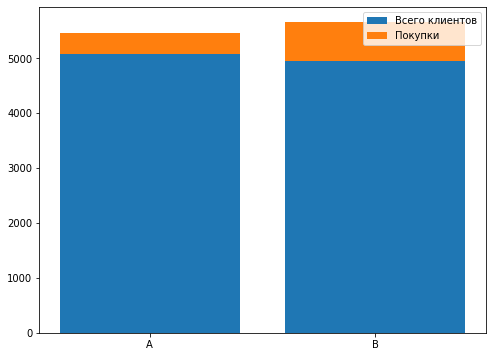

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar([1, 2], grouped['count']['converted'], label='Всего клиентов')
plt.bar([1, 2], grouped['sum']['converted'], bottom=grouped['count']['converted'], label='Покупки')
plt.xticks([1, 2], ['A', 'B'])
plt.legend();

Отборажение в виде диаграммы также наглядно показывает различия между конверсиями в выборках.

Также посмотрим непараметрический критерий (хи-квадрат)

In [17]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]), 
                                                        np.array([n1, n2]))

print(f'Results are chisq={chisq:.3f} pvalue={pvalue:.3f}')

Results are chisq=127.213 pvalue=0.000


**Вывод**

Так как мы получили маленькое p-value (pvalue=0.000) мы можем отвергнуть нулевую гипотезу в пользу альтернативной гипотезы о том, что различия между выборками статистически значимы. То есть конверсия в персонализированной группе выше чем в контрольной. Хи-квадрат критерий подтвердил результаты z-теста. 